## Acquire

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire


from sklearn.model_selection import train_test_split
from env import host, password, user 

def get_db_url(user, password, host, db):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'   


**1.  Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, ```df_iris```, from this data.**

In [2]:
df_iris = sns.load_dataset('iris')

* print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


* print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

* print the column names

In [5]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

* print the data type of each column


In [6]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [8]:
stats = df_iris.describe().T #.t is used to transpose rows and columns, not necessary
stats
# recommend changing the species name from string to numerical data

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


**2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.**

In [9]:
df_excel = pd.read_csv('Table1_CustDetails.csv')

* assign the first 100 rows to a new dataframe, df_excel_sample


In [10]:
df_excel_sample = df_excel.sample(n=100,axis = 0)

df_excel_sample.shape

(100, 12)

* print the number of rows of your original dataframe


In [11]:
df_excel.shape[0]

7049

* print the first 5 column names


In [12]:
columns = list(df_excel.columns.values.tolist())
print(columns[0:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']


* print the column names that have a data type of object


In [13]:
object_columns = df_excel.select_dtypes('object')
print(list(object_columns))


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']


* compute the range for each of the numeric variables.

In [14]:
variables = df_excel.select_dtypes(exclude = 'object')
print(list(variables))



['is_senior_citizen', 'phone_service', 'internet_service', 'contract_type', 'monthly_charges', 'total_charges']


In [15]:
df_variables = df_excel.select_dtypes(exclude = 'object')
df_variables.min(), df_variables.max()

(is_senior_citizen     0.00
 phone_service         0.00
 internet_service      0.00
 contract_type         0.00
 monthly_charges      18.25
 total_charges        18.80
 dtype: float64,
 is_senior_citizen       1.00
 phone_service           2.00
 internet_service        2.00
 contract_type           2.00
 monthly_charges       118.75
 total_charges        8684.80
 dtype: float64)

3. **Read the data from this google sheet into a dataframe, ```df_google```**


In [16]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

# Use the replace method to modify our Google Sheet share url to be a csv export url.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [17]:
# Use read_csv() method to create our DataFrame.

df_google = pd.read_csv(csv_export_url)


* **print the first 3 rows**


In [18]:
df_google = pd.read_csv('train.csv')
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* **print the number of rows and columns**


In [19]:
df_google.shape

(891, 12)

* **print the column names**


In [20]:
columns = list(df_google.columns.values.tolist())
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


* **print the data type of each column**


In [21]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* **print the summary statistics for each of the numeric variables**


In [23]:
df_numeric = df_google.select_dtypes(exclude = 'object')
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* **print the unique values for each of your categorical variables**

In [24]:
df_object = df_google.select_dtypes('object')
df_object.nunique(0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [25]:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [26]:
df_google.Survived.value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [27]:
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

## Prepare

**The end product of this exercise should be the specified functions in a python script named ```prepare.py```. Do these in your ```classification_exercises.ipynb``` first, then transfer to the ```prepare.py file```.**


**Using the Iris Data:**

1. Use the function defined in ```acquire.py``` to load the iris data.


In [30]:
import pandas as pd
from env import host, password, user 

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

from acquire import get_iris_data
import os


df_iris = get_iris_data()
df_iris.head(2)


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1


2. Drop the ```species_id``` and ```measurement_id``` columns.



In [31]:
df_iris.drop(columns=['species_id', 'measurement_id'], inplace=True)
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


3. Rename the ```species_name``` column to just ```species```.


In [32]:
df_iris.rename(columns={'species_name': 'species'}, inplace = True)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df_iris.drop_duplicates(keep='first', inplace=True)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4. Create dummy variables of the species name.


In [34]:
dummies = pd.get_dummies(df_iris[['species']])

df_iris = pd.concat([df_iris, dummies], axis=1)
df_iris.head()

dummies

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


5. Create a function named ```prep_iris``` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [35]:
def clean_iris():
    '''
    clean_iris will take one argument, an acquired df, anticipated to be
    the iris dataset -- and will 
    remove species_id and measurement_id columns, 
    rename species_name to species,
    encode the species name into two new columns
    
    return a single pandas dataframe with the above operations performed
    '''
    drop(columns=['species_id', 'measurement_id'], inplace=True)
    df_iris.rename(columns={'species_name': 'species'}, inplace = True)
    dummies = pd.get_dummies(df[['species']], drop_first = True)
    return pd.concat([df_iris, dummies], axis=1)
    

In [36]:
def prep_iris_data(df):
    '''
    clean_iris will take one argument, a dataframe acquired as a df, anticipated to be
    the iris dataset -- and will remove species_id and measurement_id columns, 
    rename species_name to species,
    encode the species name into two new columns 
    
    perform a train, validate, test split
    return: three pandads dataframes: train, validate, test
    '''
    df_iris = clean_iris()
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123, stratify=df.species)
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=123, stratify=train_validate.species)         
    return train, validate, test


### Explore

**1. Use the *iris dataset*. Split your data into train, validate, and test samples.**


In [38]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import acquire


from sklearn.model_selection import train_test_split

from acquire import get_iris_data

from prepare import clean_iris
from prepare import prep_iris

In [39]:
#default plot parameters

plt.rc('font', size = 12)
plt.rc('figure', figsize = (12,8))

In [41]:
df = get_iris_data()
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [42]:
train, validate, test = prep_iris(df)

In [43]:
#verify split of data -- tvt should equal 150 rows 
df.shape, train.shape, validate.shape, test.shape

((150, 7), (84, 7), (36, 7), (30, 7))

In [46]:
# train.head()
# validate.head()
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
127,6.1,3.0,4.9,1.8,virginica,0,1
17,5.1,3.5,1.4,0.3,setosa,0,0
65,6.7,3.1,4.4,1.4,versicolor,1,0
14,5.8,4.0,1.2,0.2,setosa,0,0
46,5.1,3.8,1.6,0.2,setosa,0,0


**2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**



In [47]:
melt = train.melt(id_vars=['species'])
melt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,virginica,sepal_length,5.6
2,setosa,sepal_length,4.6
3,versicolor,sepal_length,6.2
4,setosa,sepal_length,5.4


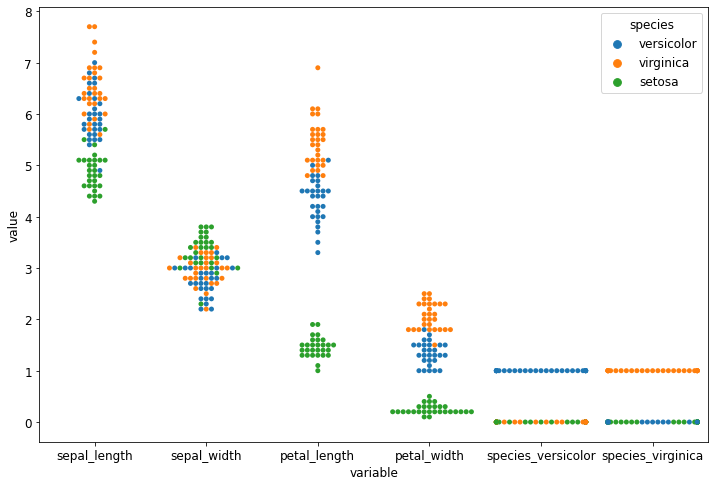

In [48]:
#From Walkthrough:
# this viz is useful b/c all of our measurements have a similar scale
sns.swarmplot(data=melt, x='variable', y='value', hue='species')
plt.show()



<font color = 'green'>**Takeaways** 
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features? 

**3. Create 4 subplots (2 rows x 2 columns) of scatterplots.**

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length

**What are your takeaways?**



In [49]:
#create columns for sepal area and petal area

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

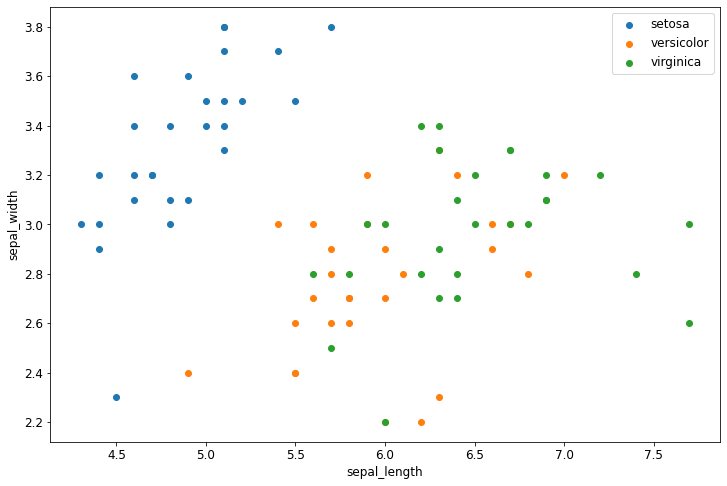

In [51]:
#create function to create subsets for subplots:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

# test it with one plot
scatter_by_species('sepal_length', 'sepal_width')

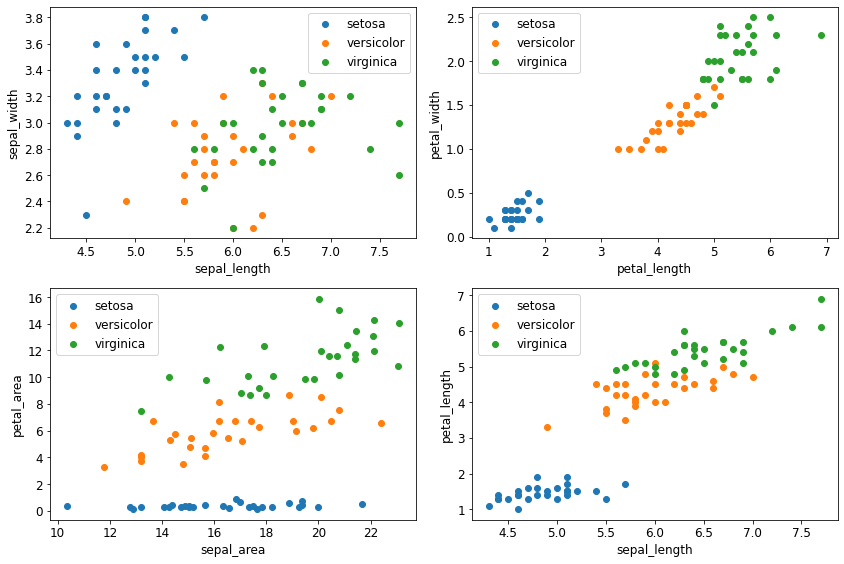

In [52]:
#create subplots

plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')

plt.tight_layout()  #for fitting

<font color = 'green'>**Takeaways:**

* sepal_length is useful, sepal_width not great but likely adds some value. 
* petal_area is very useful, as we would expect given the previous plot of petal_width x petal length. 
* sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton. 



**4.  Create a heatmap of each variable layering correlation coefficient on top.**


**NOTE FROM MAGGIE:** Please do not put a heatmap with all correlation coefficients labeled as is *in a presentation*! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.



In [53]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,sepal_area,petal_area
sepal_length,1.000000,-0.214029,0.892286,0.847808,0.161608,0.624953,0.699333,0.861037
sepal_width,-0.214029,1.000000,-0.413351,-0.320387,-0.472170,-0.094875,0.544100,-0.263537
petal_length,0.892286,-0.413351,1.000000,0.966119,0.235464,0.701507,0.471566,0.955024
petal_width,0.847808,-0.320387,0.966119,1.000000,0.109816,0.775239,0.506668,0.985342
species_versicolor,0.161608,-0.472170,0.235464,0.109816,1.000000,-0.500000,-0.200612,0.000808
species_virginica,0.624953,-0.094875,0.701507,0.775239,-0.500000,1.000000,0.473780,0.823955
sepal_area,0.699333,0.544100,0.471566,0.506668,-0.200612,0.473780,1.000000,0.556341
petal_area,0.861037,-0.263537,0.955024,0.985342,0.000808,0.823955,0.556341,1.000000


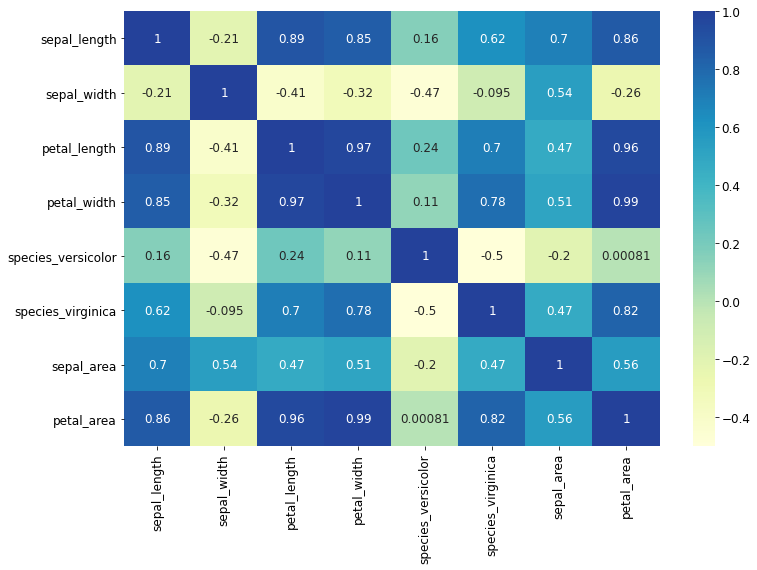

In [56]:
# crosstab = pd.crosstab(train.sepal_width, train.sepal_length, margins=True, normalize=True)
# sns.heatmap(crosstab, cmap = 'YlGnBu')
sns.heatmap(train.corr(), center = 0.4, annot = True, cmap = 'YlGnBu')
plt.show()

<font color = 'green'>**Takeaways**

* most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

* Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

* Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

* Little to no **LINEAR** correlation: sepal length & sepal width. 

**5.  Create a scatter matrix visualizing the interaction of each variable.**



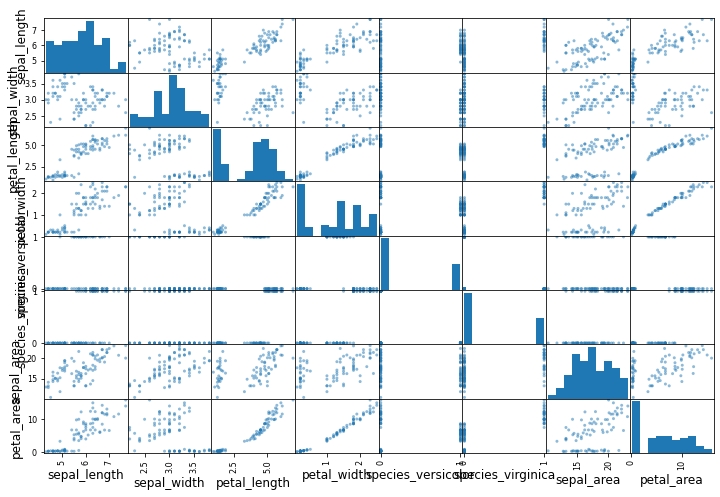

In [57]:
pd.plotting.scatter_matrix(train)
plt.show()

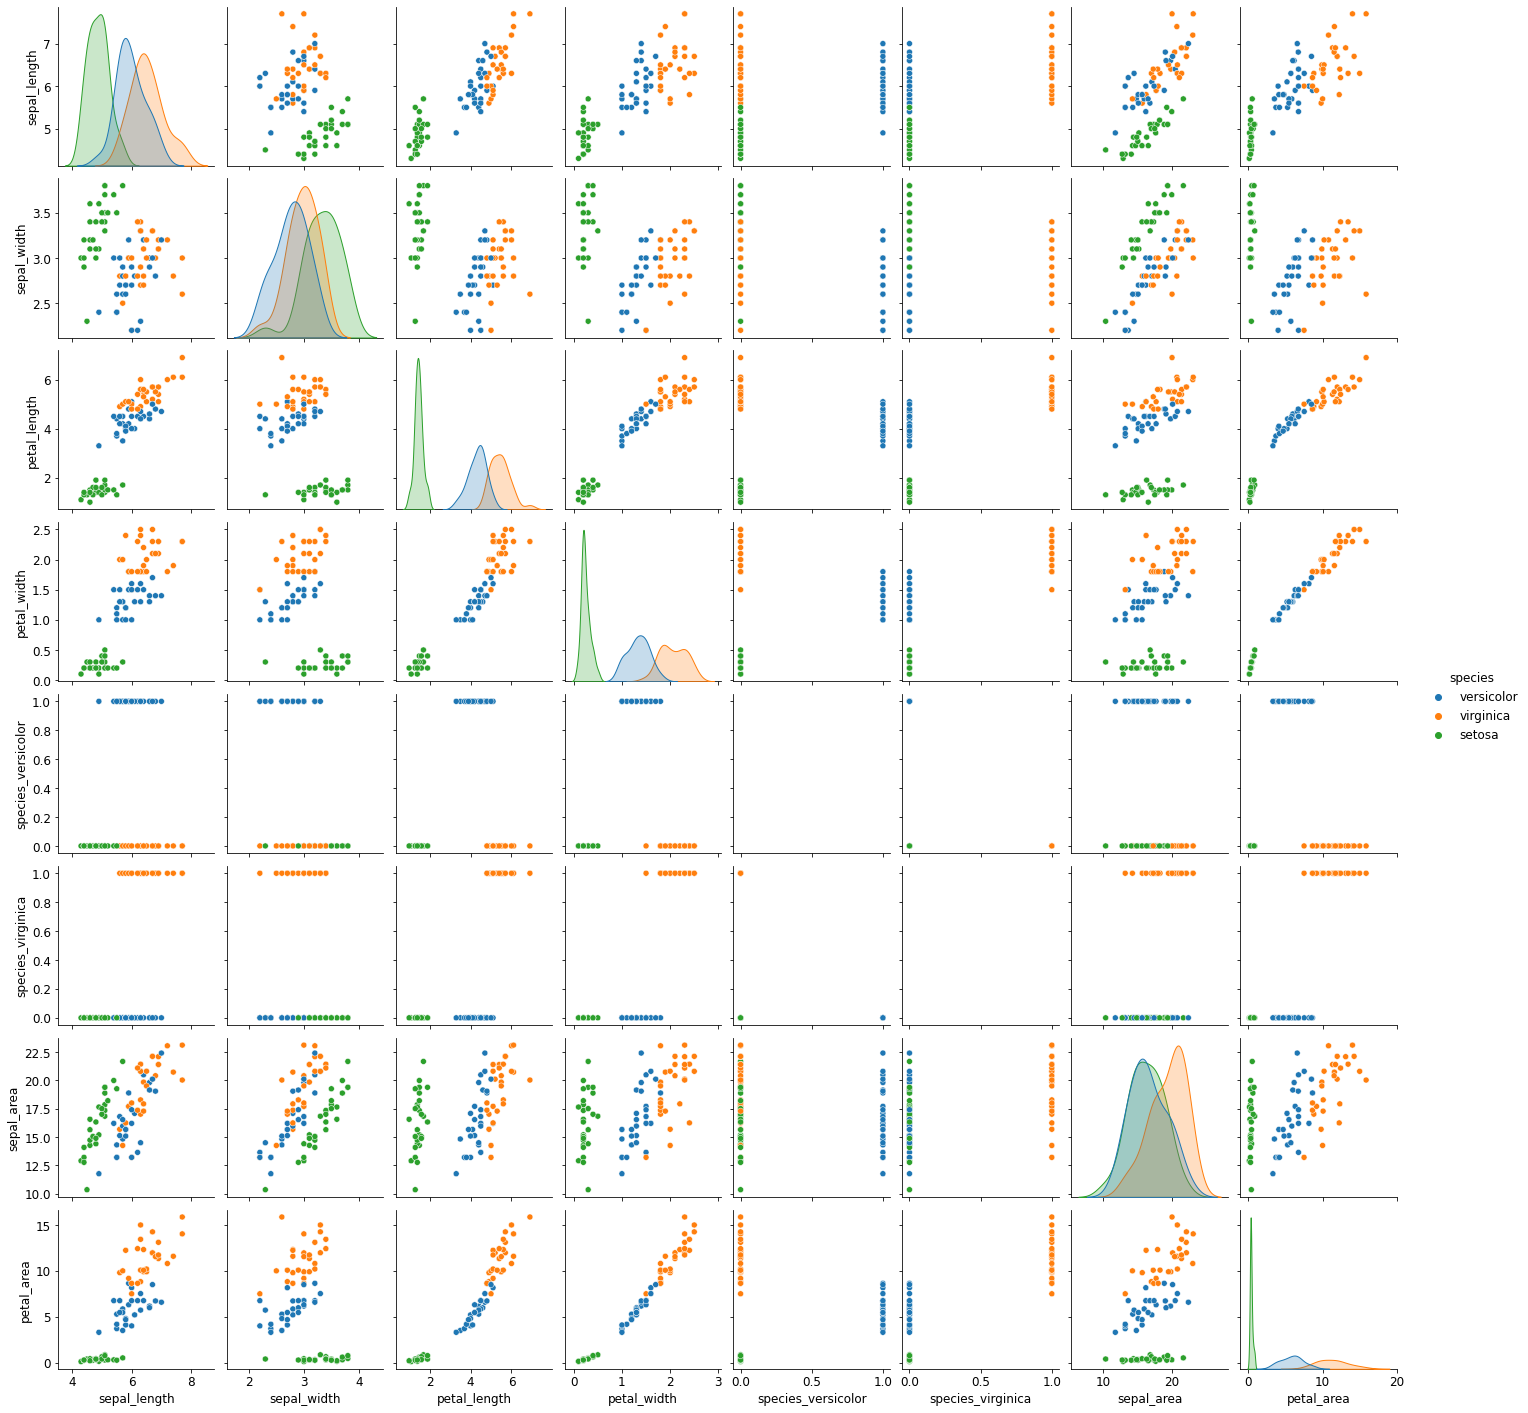

In [58]:
sns.pairplot(train, hue = 'species')
plt.show()

<font color = 'green'>**Takeaways**
* petal length + petal width show the most seperation between species.
* setosa has the shortest and narrowest petals. It will be the easiest to determine.
* petal area seems to show the largest separation between virginica & versicolor of all the individual features.
* virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
* virginica and versicolor show little to no difference when it comes to the width of the sepals.

**6.  Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.**

**Make sure to include a null hypothesis, alternative hypothesis, results, and summary.**



**NOTES TAKEN FROM WALKTHROUGH:

**Test**

We want to compare mean sepal length of the 2 different species. Therefore, a t-test or Mann-Whitney test will be useful. Mann-Whitney is the *non-parametric* version of the t-test. That means that if your data does not meet the necessary assumptions for a t-test, you can use the Mann-Whitney test. You can use it exactly the same as you would the t-test. It is just a different method to call from scipy.stats. 

**Assumptions**

Assumptions are met and we will use an independent t-test. 

- Looking at the histograms, distribution appears **normal**. 
- Looking at the histograms, **variance** appears mostly equal. 
- We know that versicolor flowers and virginica flowers are **independent** and separate species. 


**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [59]:
import scipy.stats as stats

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [60]:
# looks normal on histogram, and mean and median are very close. 
# We can assume normality with minimal risk. 

train.sepal_length.describe()

count    84.000000
mean      5.786905
std       0.827943
min       4.300000
25%       5.100000
50%       5.800000
75%       6.400000
max       7.700000
Name: sepal_length, dtype: float64

In [61]:
# variances are close. 
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.2975661375661377, 0.23231481481481475)

In [62]:
stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length
               )

Ttest_indResult(statistic=3.9202049932874052, pvalue=0.0002513791796046142)

**What is your takeaway from this statistical testing?**



**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

**7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.**

FROM WALKTHROUGH: 
    
    
What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [63]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=241.5, pvalue=0.006648194935140014)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 